THIS NOTEBOOK IS JUST FOR DATA EXPLORATION PURPOSES
1) TO FIND IF WOMEN PARTICIPATION HAS SIGNIFICANTLY INCREASED WITH TIME, 
2) TO ANALYSE THE PERFORMANCE OF COUNTRIES,
3) TO FIND OUT THE BEST ATHELETE BASED ON MEDALS ACHIEVED

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
events=pd.read_csv("/home/jovyan/athlete_events.csv")
events.info()
## we do find variables like Age, Height, Weight have missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [3]:
# lets read the other dataset available
regions=pd.read_csv("/home/jovyan/noc_regions.csv")
regions.info()
#presence of missing values is observed in variable Region

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [4]:
# merging both the dataset
olympics = pd.merge(events, regions, on="NOC", how="left")
olympics.shape

(271116, 17)

In [5]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


Filtering to only contain rows that correspond to Summer Olympics and also excluding year 1906 Intercaleted Games from the data. IN this game medals were distributed but are no longer recognized by the International Olympic Committee.

In [6]:
Summer_olympics=olympics[(olympics.Season=='Summer') & (olympics.Year!=1906)]

In [7]:
Summer_olympics.shape

(220819, 17)

In [8]:
# Descriptive Statistics
Summer_olympics.describe()
Summer_olympics.iloc[:,1:].describe()

,Age,Height,Weight,Year
count,212373.000000,170438.000000,168493.000000,220819.000000
mean,25.667288,175.511494,70.682699,1976.868947
std,6.692954,10.918801,14.805977,30.427978
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1984.000000
75%,28.000000,183.000000,79.000000,2000.000000
max,97.000000,226.000000,214.000000,2016.000000


Lets Split the data right away before any exploration is done

In [9]:

#dropping columns Id,Games and notes
Summer_olympics =Summer_olympics.drop(Summer_olympics.columns[[0,8, 16]], axis=1)


In [10]:
## filling the NaN values of column 'Region' by taking the values from 'Team' 
Summer_olympics["region"].fillna(Summer_olympics["Team"], inplace=True)
Summer_olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220819 entries, 0 to 271110
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    220819 non-null  object 
 1   Sex     220819 non-null  object 
 2   Age     212373 non-null  float64
 3   Height  170438 non-null  float64
 4   Weight  168493 non-null  float64
 5   Team    220819 non-null  object 
 6   NOC     220819 non-null  object 
 7   Year    220819 non-null  int64  
 8   Season  220819 non-null  object 
 9   City    220819 non-null  object 
 10  Sport   220819 non-null  object 
 11  Event   220819 non-null  object 
 12  Medal   33630 non-null   object 
 13  region  220819 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 25.3+ MB


In [11]:
## lets identify if there is any outlier before imputing the missing values for Age,Height and Weight.
## Identifying the outliers with skewness if any
print(Summer_olympics[['Age','Height','Weight']].skew())
Summer_olympics[['Age','Height','Weight']].describe()

Age       1.775739
Height    0.019729
Weight    0.847182
dtype: float64


,Age,Height,Weight
count,212373.000000,170438.000000,168493.000000
mean,25.667288,175.511494,70.682699
std,6.692954,10.918801,14.805977
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


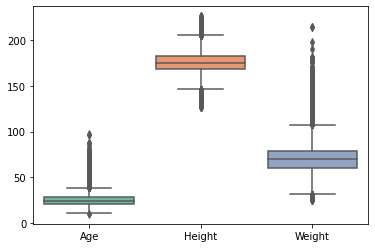

In [12]:
#identifying the outlier using Box Plot.
import seaborn as sns
ax = sns.boxplot(data=Summer_olympics.iloc[:,1:6],orient="v", palette="Set2")
#It can be observed in the box plot of Height that there are outliers. But they can be genuine outliers as the height of the basketball players can be extraordinarily high whereas the height of gymnasts can be very low.
#It can be observed in the box plot of weight that there are outliers. But they can be genuine outliers as the weight of the weightlifters can be extraordinarily high whereas the weight of gymnasts can be very low.
#Hence, even if the outliers are detected, they cannot be replaced with mean or deleted as it might then defeat the whole purpose of using data of Olympians. 

Imputing the missing values for Age,height and Weight using Median as the data is highly skewed. cite??

In [13]:
#imputing the missing values for continuous variables
#looking at the box plot, we understnad that the variables are skewed, so will be using median to impute the missing values.
import numpy as np
imp_col = ['Age','Height','Weight']
for col in imp_col:
    Summer_olympics[col] = Summer_olympics[col].fillna((Summer_olympics[col].median()))

EXPLORATORY ANALYSIS BEGINS

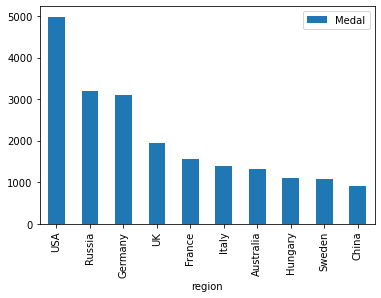

In [14]:
##which country is at Top in medal Counts
medal_count=Summer_olympics.groupby('region').count()
df = pd.DataFrame(medal_count, columns=['Medal']) 
Sort = df.sort_values(['Medal'], ascending=False)
top_count10 =Sort.head(10)
top_count10.plot(kind='bar')

#Result = US is at top

OBSERVATION: US HOLDS THE MOST NO OF MEDALS FOLLOWED BY RUSSIA AND THEN GERMANY SINCE THE BEGINNING

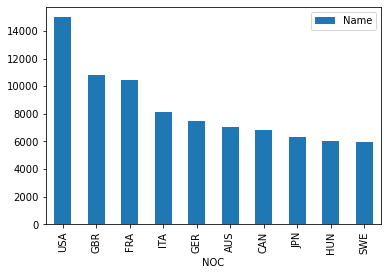

In [15]:
## participation by country
participants_count=Summer_olympics.groupby('NOC').count()
df1 = pd.DataFrame(participants_count, columns=['Name']) 
Sort_p = df1.sort_values(['Name'], ascending=False)
top_count =Sort_p.head(10)
top_count
top_count.plot(kind='bar')


OBSERVATION: more participation = more medal win. USA has maximum participation with max no of medal wins.

In [16]:
#top 10 players with Most number of Medals throughout
medal = Summer_olympics.groupby(['Year','Name','Medal']).size().unstack('Medal',fill_value=0)
medal['Total'] = medal['Gold'] +medal['Silver'] +medal['Bronze'] 
medal.reset_index(inplace=True)
topplayers=[group.sort_values('Total',ascending=False)[:1] for year,group in medal.groupby('Year')]
topplayers
top=pd.DataFrame()
for i in topplayers:
    top = top.append(i)
top.tail()


Medal,Year,Name,Bronze,Gold,Silver,Total
20950,2000,Aleksey Yuryevich Nemov,3,2,1,6
23938,2004,"Michael Fred Phelps, II",2,6,0,8
24843,2008,"Michael Fred Phelps, II",0,8,0,8
26466,2012,"Michael Fred Phelps, II",0,4,2,6
28150,2016,"Michael Fred Phelps, II",0,5,1,6


OBSERVATION: Michael Fred Phelps, II has been the most successful athlete since 2004.

NOW LETS SEE THE GROWTH OF FEMALE PARTICIPATION OVER THE YEARS

In [17]:
#female participation over the years
groupedGender = Summer_olympics.groupby('Year')['Sex'].value_counts()
groupedGender

Year  Sex
1896  M       380
1900  M      1903
      F        33
1904  M      1285
      F        16
1908  M      3054
      F        47
1912  M      3953
      F        87
1920  M      4158
      F       134
1924  M      4989
      F       244
1928  M      4588
      F       404
1932  M      2622
      F       347
1936  M      6038
      F       468
1948  M      5777
      F       628
1952  M      6773
      F      1497
1956  M      4234
      F       893
1960  M      6684
      F      1435
1964  M      6354
      F      1348
1968  M      6811
      F      1777
1972  M      8111
      F      2193
1976  M      6469
      F      2172
1980  M      5435
      F      1756
1984  M      7007
      F      2447
1988  M      8494
      F      3543
1992  M      8853
      F      4124
1996  M      8772
      F      5008
2000  M      8390
      F      5431
2004  M      7897
      F      5546
2008  M      7786
      F      5816
2012  M      7105
      F      5815
2016  M      7465
      F      6223


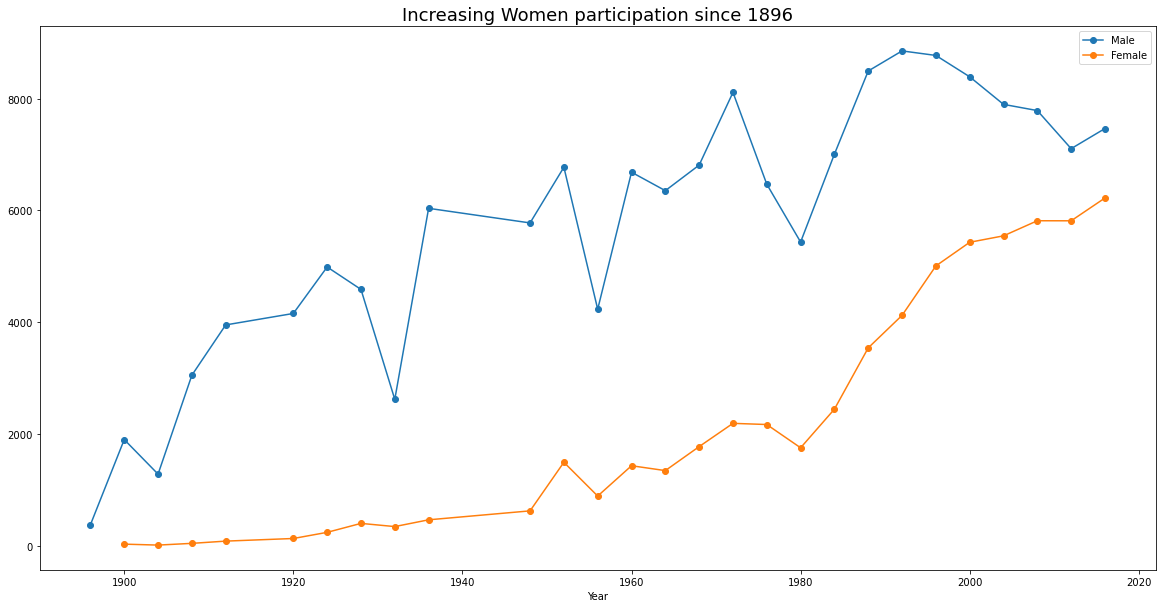

In [18]:
#Lets Plot it
groupedGender = Summer_olympics.groupby('Year')['Sex'].value_counts()
plt.subplots(figsize=(20, 10))
groupedGender.loc[:,'M'].plot(marker = 'o',label = 'Male')
groupedGender.loc[:,'F'].plot(marker = 'o',label = 'Female')
plt.ylabel='Gender Count'
plt.legend()
plt.title('Increasing Women participation since 1896', fontsize="18")
plt.show()

OBSERVATION: Female participations has been increasing gradually and closing the gap with men. It has increased from 0 participation in 1896 to 6223 in 2016 compared to 7465 male participation. 

In [19]:
#Women medal win over the years
WomenInOlympics= Summer_olympics[(Summer_olympics.Sex == 'F')]
medal_F = WomenInOlympics.groupby(['Year','Medal']).size().unstack('Medal',fill_value=0)
medal_F['Total'] = medal_F['Gold'] +medal_F['Silver'] +medal_F['Bronze']
medal_F.reset_index(inplace=True)
medal_F

Medal,Year,Bronze,Gold,Silver,Total
0,1900,5,4,4,13
1,1904,2,6,2,10
2,1908,5,6,5,16
3,1912,10,10,10,30
4,1920,14,15,15,44
5,1924,15,15,16,46
6,1928,33,32,32,97
7,1932,20,20,22,62
8,1936,30,29,29,88
9,1948,35,33,33,101


<Figure size 1440x720 with 0 Axes>

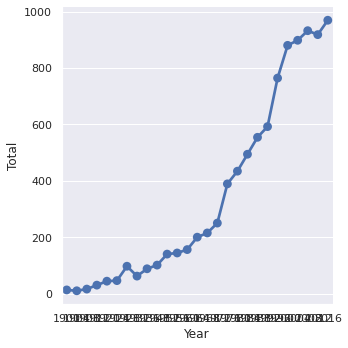

In [20]:
## lets plot it
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.catplot(x="Year",y="Total", data=medal_F, kind='point')

OBSERVATION: Women contribution to medal win has been increasing throughly.

In [21]:
#Number of women relative to men across countries

newdf = Summer_olympics[['NOC','Year','Name','Sex']]
newdf = newdf.drop_duplicates()

malefemale_count=newdf.groupby(['Year','NOC','Sex'])["Sex"].count().reset_index(name="counts")

Sort_F = malefemale_count.sort_values(['Year','Sex','counts'], ascending=(False,True,False))

Sort_M = malefemale_count.sort_values(['Year','Sex','counts'], ascending=(False,False,False))
print(Sort_F,Sort_M)

      Year  NOC Sex  counts
4841  2016  USA   F     291
4526  2016  CHN   F     240
4471  2016  AUS   F     212
4502  2016  BRA   F     207
4593  2016  GER   F     194
...    ...  ...  ..     ...
2     1896  DEN   M       3
9     1896  SUI   M       3
0     1896  AUS   M       1
8     1896  ITA   M       1
10    1896  SWE   M       1

[4858 rows x 4 columns]       Year  NOC Sex  counts
4842  2016  USA   M     264
4503  2016  BRA   M     255
4579  2016  FRA   M     225
4594  2016  GER   M     224
4472  2016  AUS   M     208
...    ...  ...  ..     ...
2     1896  DEN   M       3
9     1896  SUI   M       3
0     1896  AUS   M       1
8     1896  ITA   M       1
10    1896  SWE   M       1

[4858 rows x 4 columns]


OBSERVATION: In 2016 U.S. team sent more women than men i.e 291 Female vs 264 Men

In [22]:
##Different Sports played
Summer_olympics["Sport"].value_counts()

Athletics                38154
Gymnastics               26551
Swimming                 23117
Shooting                 11128
Cycling                  10721
Fencing                  10574
Rowing                   10395
Wrestling                 7115
Football                  6700
Sailing                   6586
Equestrianism             6344
Canoeing                  6171
Boxing                    6047
Hockey                    5417
Basketball                4536
Weightlifting             3915
Water Polo                3846
Judo                      3801
Handball                  3665
Art Competitions          3578
Volleyball                3404
Diving                    2818
Tennis                    2814
Archery                   2334
Table Tennis              1955
Modern Pentathlon         1677
Badminton                 1457
Synchronized Swimming      909
Baseball                   894
Rhythmic Gymnastics        658
Taekwondo                  606
Beach Volleyball           564
Triathlo

In [23]:
#Medal Distribution
Summer_olympics.Medal.value_counts()

Gold      11302
Bronze    11264
Silver    11064
Name: Medal, dtype: int64

Country with most Gold Medal

In [24]:
goldMedals = Summer_olympics[(Summer_olympics.Medal == 'Gold')]

Gold      11302
Bronze    11264
Silver    11064
Name: Medal, dtype: int64
Country with most Gold Medal

In [25]:
goldMedals.region.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,USA,2460
1,Russia,1220
2,Germany,1061
3,UK,627
4,Italy,497
5,France,445
6,Hungary,427
7,Australia,362
8,Sweden,352
9,China,335


US has most of the Gold Medals with them.

WE COULD CONCLUDE THAT USA IS LEADING IN ALL THE AREAS
1)No. of Total Medals
2)Top Athelete
3)Maximum Women Participation